# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

In [3]:
customers.shape

(440, 8)

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [4]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

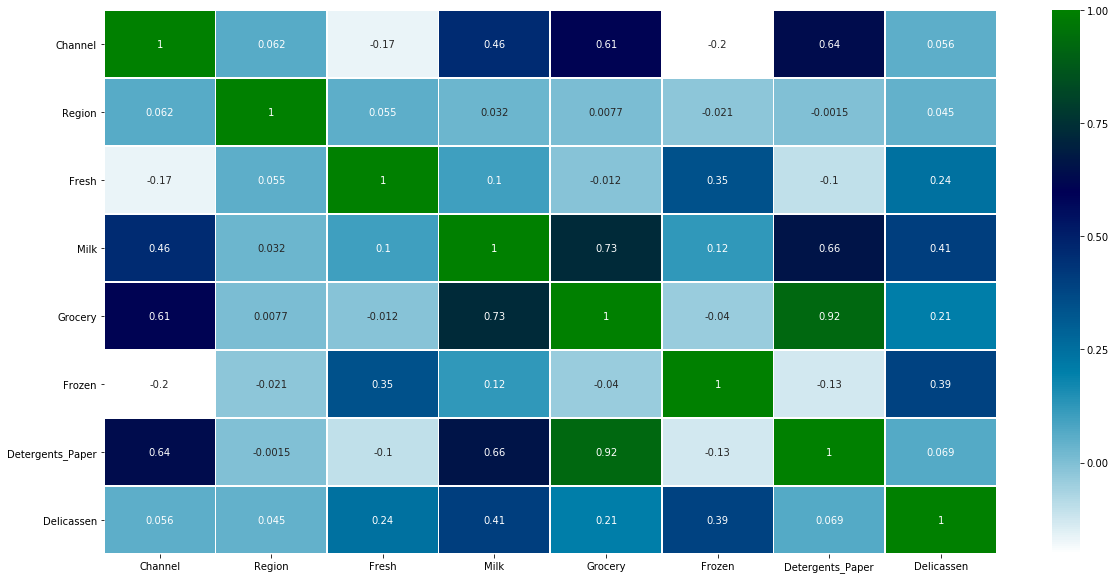

In [7]:
plt.subplots(figsize=(20, 10))
sns.heatmap(customers.corr(), annot=True, linewidth=0.5, cmap = 'ocean_r');

In [8]:
from scipy import stats

In [9]:
customers = customers[(np.abs(stats.zscore(customers)) < 3).all(axis=1)]

#He encontrado 4 outliers y me he quedado directamente con el resto

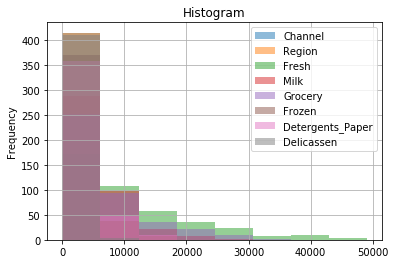

In [10]:
customers.plot.hist(alpha=0.5, bins=8, grid=True) 
plt.title("Histogram")
plt.show()

In [11]:
#The dataset has a a right skewed distribution.

In [12]:
customers_group = customers.groupby('Region').sum()

In [13]:
customers_group

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,86,694136,337665,445914,191220,150364,88647
2,63,423439,217380,352350,129132,133937,47682
3,395,3317093,1461930,2022750,735306,698284,376178


In [14]:
for i in customers_group.columns:
    print(i, round(customers_group[i].max()/customers_group[i].sum()*100, 2))

Channel 72.61
Fresh 74.8
Milk 72.48
Grocery 71.7
Frozen 69.65
Detergents_Paper 71.07
Delicassen 73.4


In [15]:
#No se cumple en ninguno de los casos porque no representan el 80% de los datos

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [16]:
#Ya he eliminado los outliers arriba y creo que no hay que limpiar nada más del dataset

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers)
customers_scale = pd.DataFrame(customers_scale)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [19]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(customers_scale)

In [20]:
customers['labels'] = kmeans.labels_

Count the values in `labels`.

In [21]:
customers['labels'].value_counts()

1    287
0    127
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [22]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5).fit(customers_scale);
customers['labels_DBSCAN'] = dbscan.labels_

Count the values in `labels_DBSCAN`.

In [23]:
customers['labels_DBSCAN'].value_counts()

-1    343
 0     71
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

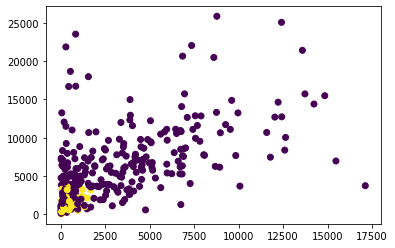

In [44]:
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=dbscan.labels_);

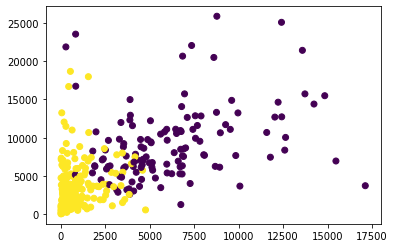

In [36]:
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=kmeans.labels_);

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

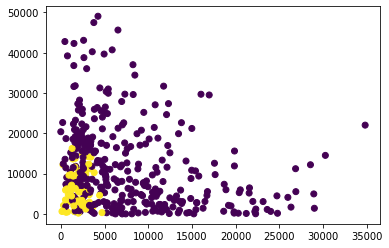

In [26]:
plt.scatter(customers['Grocery'], customers['Fresh'], c=dbscan.labels_);

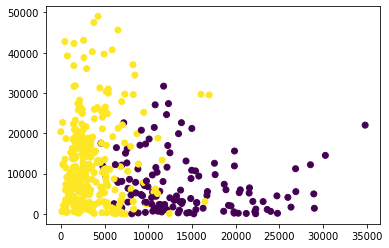

In [45]:
plt.scatter(customers['Grocery'], customers['Fresh'], c=kmeans.labels_);

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

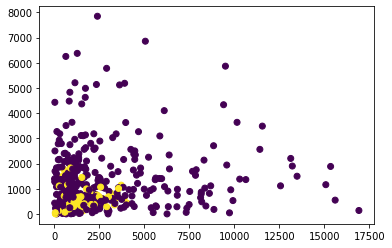

In [27]:
plt.scatter(customers['Frozen'], customers['Delicassen'], c=dbscan.labels_);

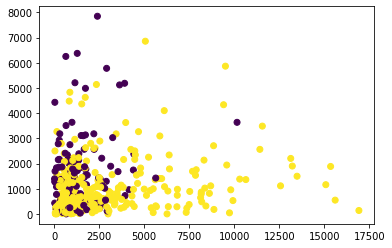

In [46]:
plt.scatter(customers['Frozen'], customers['Delicassen'], c=kmeans.labels_);

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [28]:
customers.groupby(['labels', 'labels_DBSCAN']).mean()

Channel    Region         Fresh         Milk  \
labels labels_DBSCAN                                                  
0      -1             1.952756  2.637795   7435.110236  9225.110236   
1      -1             1.041667  2.347222  14115.208333  3413.750000   
        0             1.000000  3.000000   6218.647887  1521.352113   

                           Grocery       Frozen  Detergents_Paper   Delicassen  
labels labels_DBSCAN                                                            
0      -1             14244.787402  1410.622047       6150.456693  1609.346457  
1      -1              4047.000000  3588.222222        797.736111  1240.578704  
        0              1940.478873  1428.915493        410.788732   565.563380

Which algorithm appears to perform better?

In [29]:
# Ninguno parece demasiado bueno pero, a priori parece que los resultados de DBSCAN son mejores
# que los de K-means.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [30]:
# 

In [31]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [32]:
# Your code here

In [33]:
# Your comment here